# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv, IRPEnv
from agents.ff_sdp_agent import SDPAgentFF

import torch


## Train the agent

In [2]:
batch_size = 32
seed = 123
num_nodes = 7

num_epochs = 1001
# num_epochs = 251
lr=1E-4
gamma = 0.99
dropout_rate = 0.5
hidden_dim=1024


# Instantiate the SantaIRPEnv environment
env_santa = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent_santa_ff = SDPAgentFF(node_dim=num_nodes,hidden_dim=hidden_dim,lr=lr,gamma=gamma,dropout_rate=dropout_rate,
    seed=seed, csv_path=f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv",
)

# Train the agent
agent_santa_ff.train(
    env_santa,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_ff_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Saved new best model at episode 0 with loss: 9.103737831115723
INFO:root:Saved new best model at episode 1 with loss: 8.585602760314941
INFO:root:Saved new best model at episode 3 with loss: 7.898308753967285
INFO:root:Saved new best model at episode 5 with loss: 7.509139060974121
INFO:root:Saved new best model at episode 6 with loss: 6.680749416351318
INFO:root:Saved new best model at episode 10 with loss: 6.545366287231445
INFO:root:Saved new best model at episode 12 with loss: 6.520364284515381
INFO:root:Saved new best model at episode 13 with loss: 6.388932704925537
INFO:root:Saved new best model at episode 14 with loss: 6.11979866027832
INFO:root:Saved new best model at episode 15 with loss: 5.3841962814331055
INFO:root:Saved new best model at episode 16 with loss: 5.306187152862549
INFO:root:Saved new best model at episode 18 with loss: 5.085660934448242
INFO:root:Saved new best model at episode 21 with loss: 4.877930164337158
INFO:root:Saved ne

Epoch 00729: reducing learning rate of group 0 to 1.0000e-05.


INFO:root:Episode 750 finished - Loss: 4.810841083526611
INFO:root:Episode 800 finished - Loss: 4.528384208679199
INFO:root:Episode 850 finished - Loss: 5.070704460144043
INFO:root:Episode 900 finished - Loss: 5.4784369468688965


Epoch 00930: reducing learning rate of group 0 to 1.0000e-06.


INFO:root:Episode 950 finished - Loss: 4.202097415924072
INFO:root:Episode 1000 finished - Loss: 4.9131269454956055


## Visualise the actions of the agent in the environments

In [3]:
# Setup for evaluation
env_santa.reset()
env_santa.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_ff_{num_nodes}_{seed}.mp4"
)

In [4]:
# load the best agent from training
agent_santa_ff.model.load_state_dict(torch.load(f"./check_points/santa_ff_{num_nodes}_{seed}/best_model.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

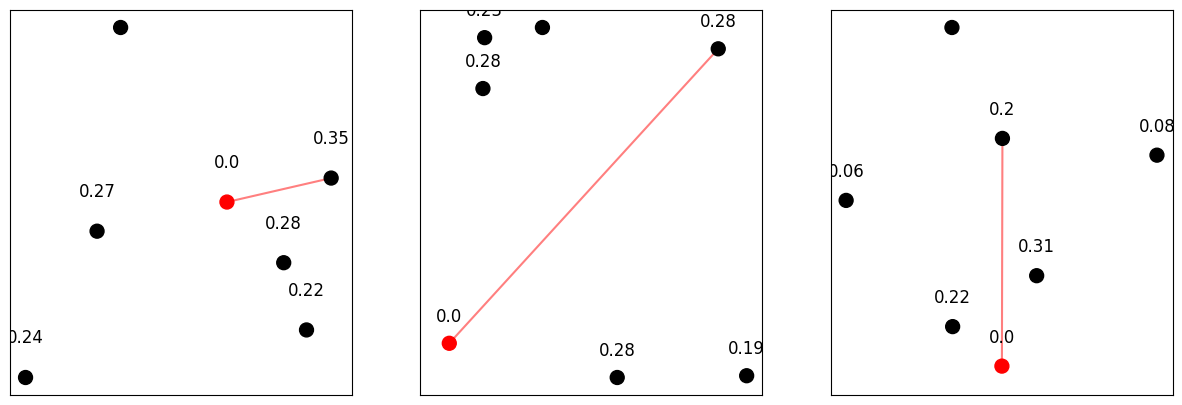

<Figure size 640x480 with 0 Axes>

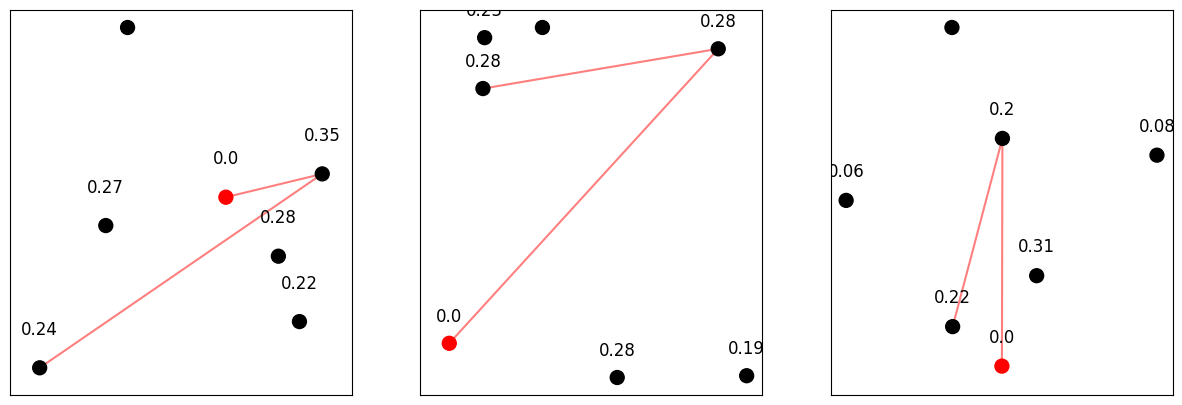

<Figure size 640x480 with 0 Axes>

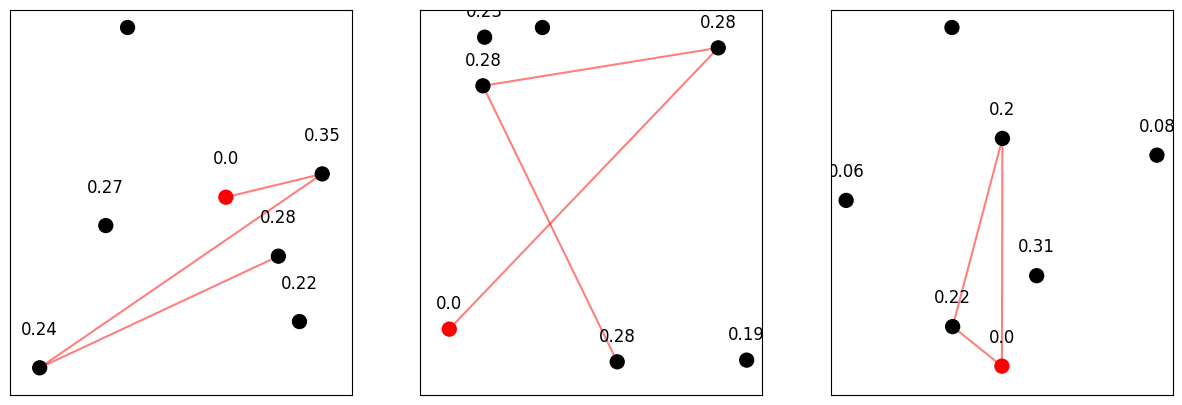

<Figure size 640x480 with 0 Axes>

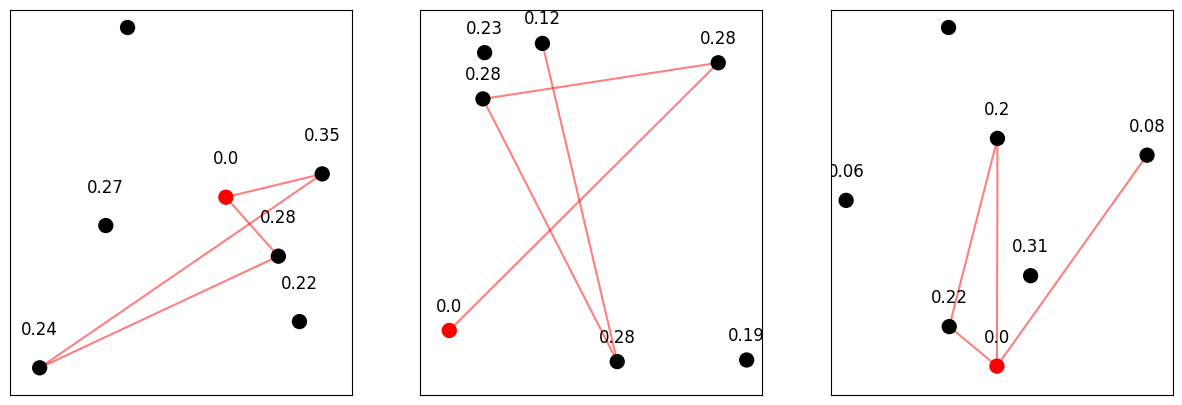

<Figure size 640x480 with 0 Axes>

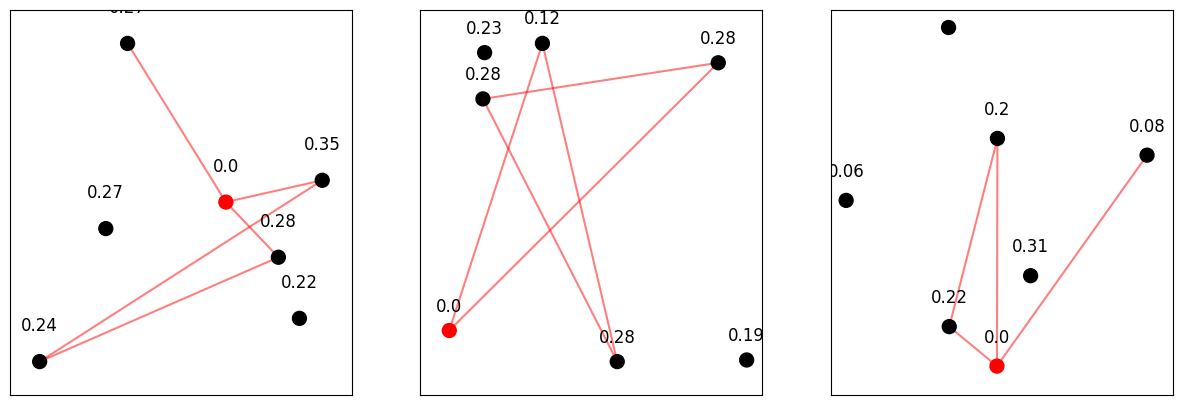

<Figure size 640x480 with 0 Axes>

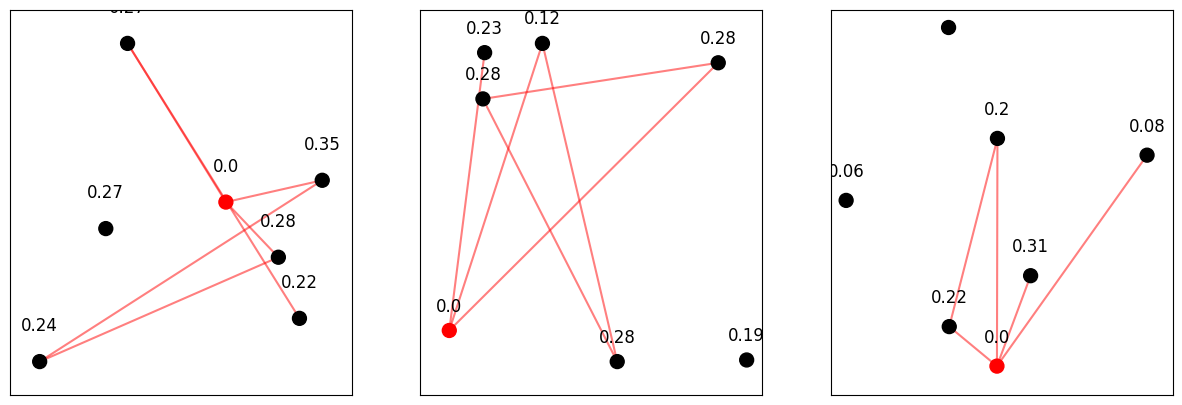

<Figure size 640x480 with 0 Axes>

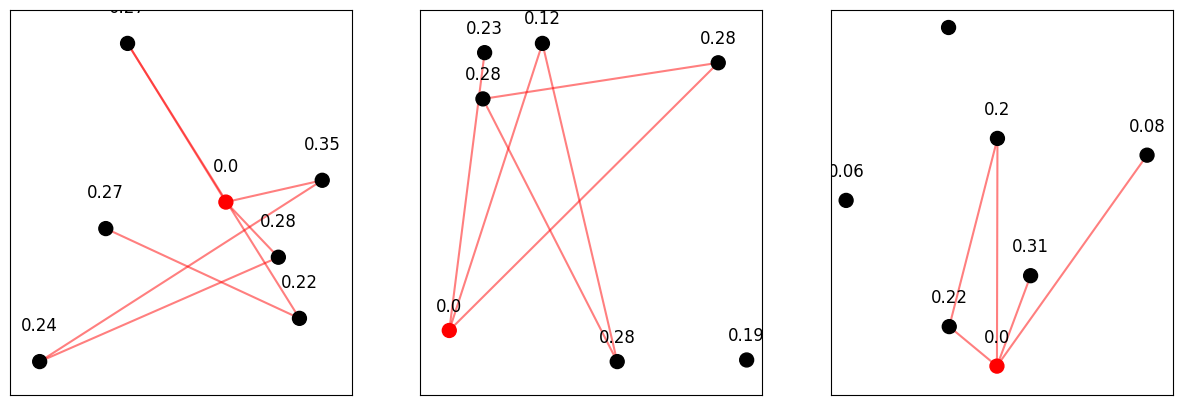

<Figure size 640x480 with 0 Axes>

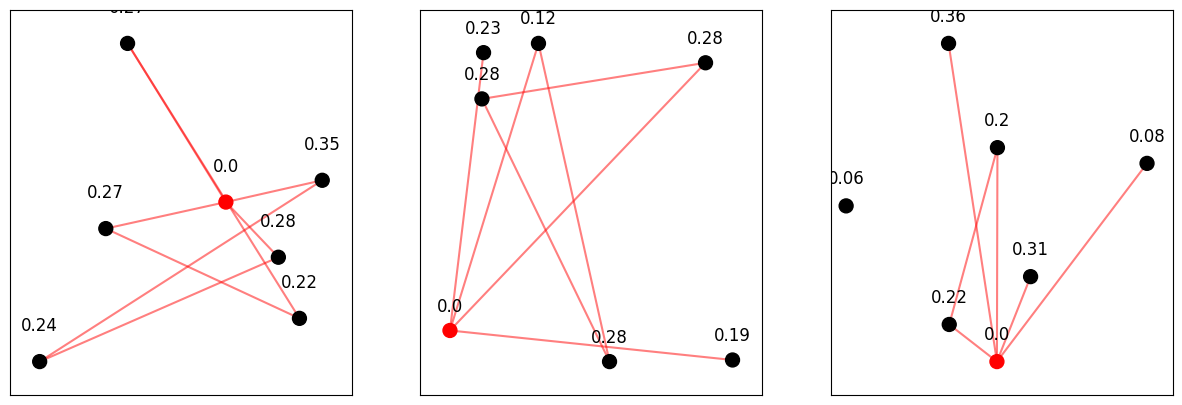

<Figure size 640x480 with 0 Axes>

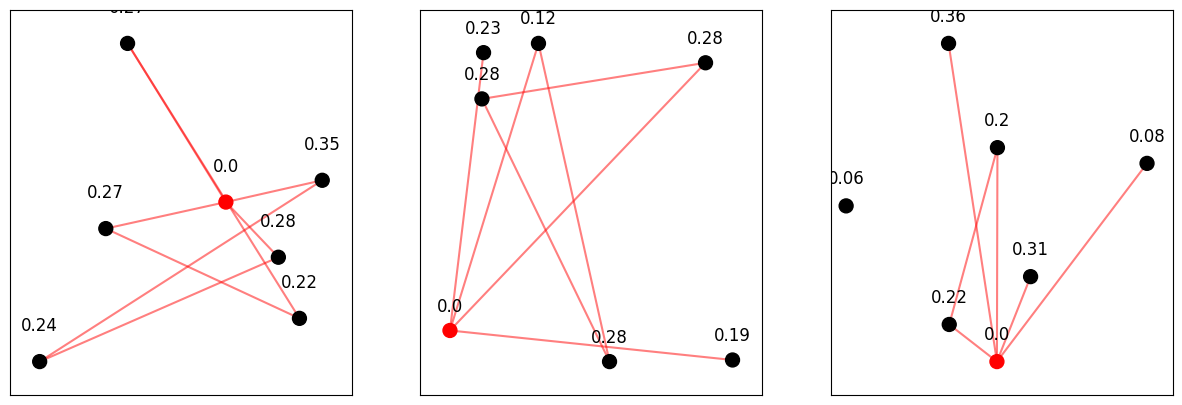

<Figure size 640x480 with 0 Axes>

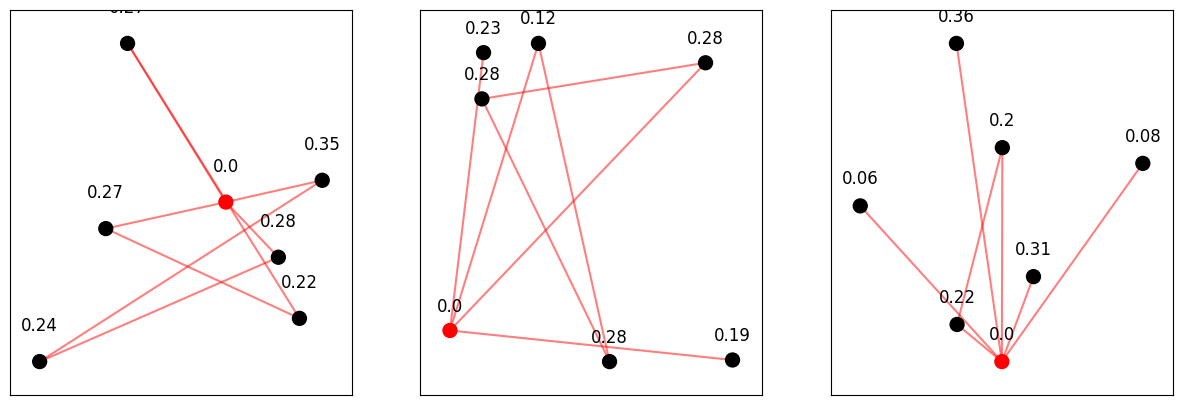

<Figure size 640x480 with 0 Axes>

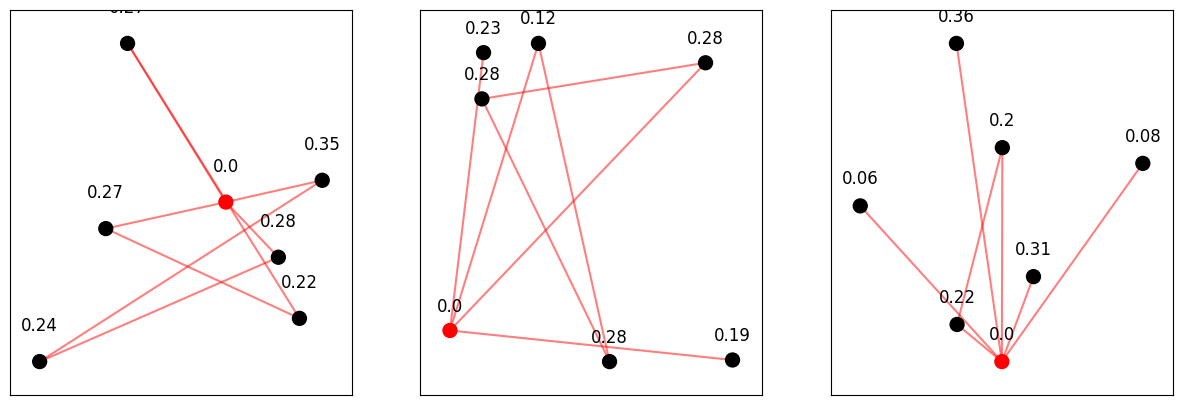

In [5]:
# Evaluate the agent
loss_a = agent_santa_ff.evaluate(env_santa)

In [6]:
# Close the video recorder
env_santa.vid.close()

In closing function
Environment closing
Moviepy - Building video ./videos/video_test_santa_ff_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123.mp4


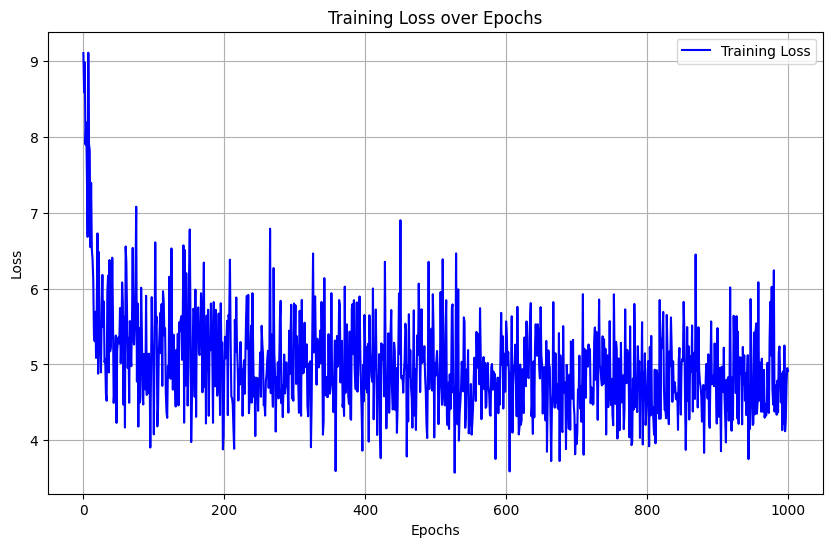

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
